### Background of Project

We are given a dataset of housing prices and possibily, related variables that we are to use to predict housing prices in Ames, Iowa. 

### Problem Statement: 

- What is the predicted price of a house given its features?

## Steps to implement
1. Import the libraries from https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data
2. Read the dataset using pandas from the train.csv file (file set aside for training)
3. Cleaning the dataset into a usable and clear state.
4. Create a linear regression model based on the training data. 
5. Evaluate our linear regression model on Kaggle.

## Important notes
**Target:** SalePrice

### 1. Import the necessary python libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas_profiling

### 2. Import the csv into a dataframe

Data is imported from [here](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)

In [3]:
#import train data
df = pd.read_csv("../project_2/datasets/train.csv", index_col= 'Id')

### 3. Visually inspect the type of data

In [4]:
#look at the data structure
df.info()
#columns of note: Alley, Pool QC, Fence, Misc Feature, Fireplace QC  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

In [5]:
df.shape

(2051, 80)

**Dropping data that have significantly incomplete data**

Data that are have less than 60% data are dropped as they would signifcantly influence the data.

In [6]:
df = df.drop('Alley', axis = 1)

In [7]:
df = df.drop('Pool QC', axis = 1)

In [8]:
df = df.drop("Fence", axis = 1)

In [9]:
df = df.drop("Misc Feature", axis = 1)

In [10]:
df = df.drop("Fireplace Qu", axis = 1)

In [11]:
df = df.drop("PID", axis = 1)

In [12]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,44,0,0,0,0,0,3,2010,WD,130500
544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,74,0,0,0,0,0,4,2009,WD,220000
153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,52,0,0,0,0,0,1,2010,WD,109000
318,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,4,2010,WD,174000
255,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,59,0,0,0,0,0,3,2010,WD,138500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a13261e10>,
      dtype=object)

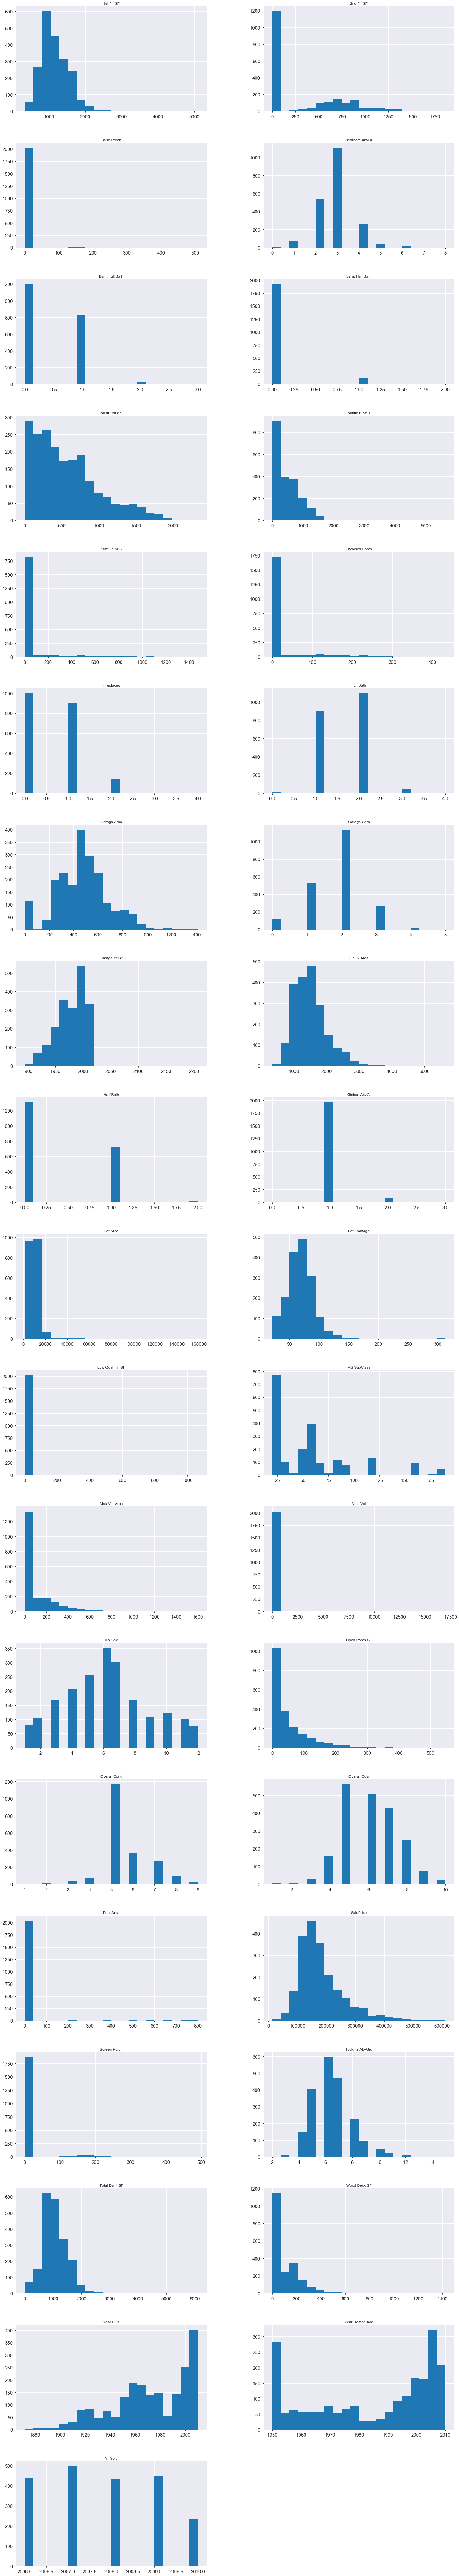

In [13]:
df.hist(figsize = (25,150), layout= (19,2), bins = 20, ylabelsize = 15, xlabelsize =15 )

**Populating a list of columns from the dataframe and their options**

To check what are the data and its columns available from the dataset. 

In [14]:
for col in (list(df.columns)):
    print(col, ":", df[col].unique())

MS SubClass : [ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]
MS Zoning : ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
Lot Frontage : [ nan  43.  68.  73.  82. 137.  35.  70.  21.  64. 120.  24.  74.  93.
  34.  80.  71.  72. 109.  40. 103. 100.  92.  65.  75.  60.  30.  79.
  41. 105. 107.  81.  36.  63.  32.  94.  44.  50.  48.  67.  88.  83.
  53.  58.  57.  52.  87. 134.  56.  54. 140.  78.  85.  90.  96.  62.
  49.  59. 155.  91.  61.  86. 128.  77.  42.  89.  51.  69.  55. 112.
  76. 125.  98. 113. 102.  22. 122.  84. 119. 118.  66.  95. 108. 195.
 106.  39. 110. 130.  97.  45.  37. 123.  38. 129. 115.  47. 114. 104.
  46. 121. 124. 313. 141. 101.  99. 160. 174.  26. 144. 138. 111.  25.
  33. 200. 150. 117. 153. 116. 135.]
Lot Area : [13517 11492  7922 ... 12444 11449  7558]
Street : ['Pave' 'Grvl']
Lot Shape : ['IR1' 'Reg' 'IR2' 'IR3']
Land Contour : ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities : ['AllPub' 'NoSeWa' 'NoSewr']
Lot Config : ['CulDSac' 'Inside' 'Corn

**Renaming columns to remove all capitalised entries, and also spaces.** 

Capitalisation and spaces were removed to make the dataset easier to recall column names by my own memory.

In [15]:
n_col = df.columns
rename_dict = {}
for col in n_col: 
    rename_dict[col] = col.lower().replace(' ', "")

df.rename(columns = rename_dict, inplace = True)
df.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremod/add', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'garagetype', 'garageyrblt', 'garagefinish',
       'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive',
       'wooddecksf', 'openporchsf

**Identifying categorical and continuous variables**

I will be using iteration of the dataframe column index to identify which variables are categorical or continuous.

In [16]:
## to populate a list of categorical variables
cat_col = df.columns
cat_list = list(df.select_dtypes(include = 'object').columns)

In [17]:
## iterating through the categorical variable list to print out the variables and the unique entries
for col in cat_list:
    print(col, df[col].unique())
    
## creating a dictionary of categorical variables and the number of categories 
cat_options = {}
for col in cat_list:
    cat_options[col] = len(df[col].unique())

mszoning ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
street ['Pave' 'Grvl']
lotshape ['IR1' 'Reg' 'IR2' 'IR3']
landcontour ['Lvl' 'HLS' 'Bnk' 'Low']
utilities ['AllPub' 'NoSeWa' 'NoSewr']
lotconfig ['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
landslope ['Gtl' 'Sev' 'Mod']
neighborhood ['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
condition1 ['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
condition2 ['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
bldgtype ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
housestyle ['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
roofstyle ['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
roofmatl ['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran' 'ClyTile']
exterior1st ['Hd

In [18]:
# listing out continuous variables
cont_col = df.columns
cont_list = list(df.select_dtypes(include = 'int').columns)

In [19]:
df[cont_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 26 columns):
mssubclass       2051 non-null int64
lotarea          2051 non-null int64
overallqual      2051 non-null int64
overallcond      2051 non-null int64
yearbuilt        2051 non-null int64
yearremod/add    2051 non-null int64
1stflrsf         2051 non-null int64
2ndflrsf         2051 non-null int64
lowqualfinsf     2051 non-null int64
grlivarea        2051 non-null int64
fullbath         2051 non-null int64
halfbath         2051 non-null int64
bedroomabvgr     2051 non-null int64
kitchenabvgr     2051 non-null int64
totrmsabvgrd     2051 non-null int64
fireplaces       2051 non-null int64
wooddecksf       2051 non-null int64
openporchsf      2051 non-null int64
enclosedporch    2051 non-null int64
3ssnporch        2051 non-null int64
screenporch      2051 non-null int64
poolarea         2051 non-null int64
miscval          2051 non-null int64
mosold           2051 non-null int64
yrsol

In [20]:
df[cont_list].describe()

,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremod/add,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,10065.208191,6.112140,5.562165,1971.708922,1984.190151,1164.488055,329.329108,5.512921,1499.330083,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,42.824223,6742.488909,1.426271,1.104497,30.177889,21.036250,396.446923,425.671046,51.068870,500.447829,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,879.500000,0.000000,0.000000,1129.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,50.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,1093.000000,0.000000,0.000000,1444.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,1405.000000,692.500000,0.000000,1728.500000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,1862.000000,1064.000000,5642.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


### 4. Exploring correlations between continuous variables 
Correlations between continuous variables were explored to see if they had good significant Pearson correlation with `saleprice` and then were tested for multicollinearity using varience inflation factor from scikit learn. 

(array([0.5]), <a list of 1 Text xticklabel objects>)

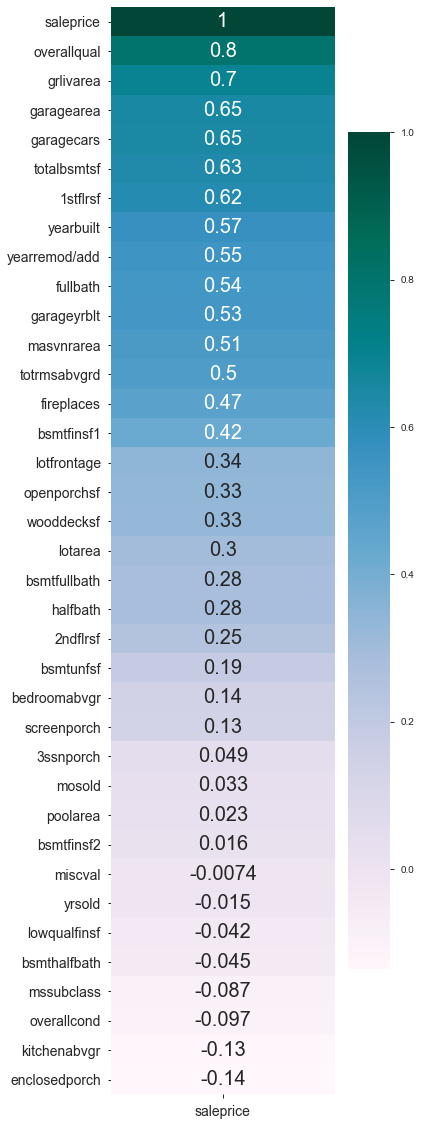

In [21]:
plt.figure(figsize = (5,20))
#ax = sns.heatmap(df[cont_list].corr(), annot = True)

ax= sns.heatmap(df.corr()[cont_list][['saleprice']].sort_values(by = 'saleprice',ascending = False),annot=True,  annot_kws={"size": 20}, cmap='PuBuGn')
ax.set_ylim(37,0)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [22]:
## calculating the P value of the correlations above
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(stats.pearsonr(df[r], df[c])[1], 4)
    return pvalues

## calculating the P values of the correlation between continuous variables and saleprice
calculate_pvalues(df[cont_list])['saleprice'].sort_values(ascending = False)

miscval          0.7385
yrsold           0.4914
poolarea         0.2956
mosold           0.1383
lowqualfinsf     0.0596
3ssnporch        0.0273
mssubclass       0.0001
grlivarea             0
lotarea               0
overallqual           0
overallcond           0
yearbuilt             0
yearremod/add         0
1stflrsf              0
2ndflrsf              0
saleprice             0
fullbath              0
halfbath              0
kitchenabvgr          0
totrmsabvgrd          0
fireplaces            0
wooddecksf            0
openporchsf           0
enclosedporch         0
screenporch           0
bedroomabvgr          0
Name: saleprice, dtype: object

In [23]:
## making a function to find collinearity between expected collinear variables
def viffinder(varlist):
    vif = pd.DataFrame()
    vif["variables"] = varlist
    vif["VIF"] = [variance_inflation_factor(df[varlist].dropna().values, i) for i in range(df[varlist].shape[1])]
    print(vif)

In [24]:
## selecting the top few variables correlation to saleprice, positive correlations 
## were chosen as negative correlations had small correlation coefficients.

top_corr_list = list(df.corr()[cont_list][['saleprice']].sort_values(by = 'saleprice',\
                                                ascending = False).nlargest(20,['saleprice']).index)
print(top_corr_list)


['saleprice', 'overallqual', 'grlivarea', 'garagearea', 'garagecars', 'totalbsmtsf', '1stflrsf', 'yearbuilt', 'yearremod/add', 'fullbath', 'garageyrblt', 'masvnrarea', 'totrmsabvgrd', 'fireplaces', 'bsmtfinsf1', 'lotfrontage', 'openporchsf', 'wooddecksf', 'lotarea', 'bsmtfullbath']


(array([0.5, 1.5, 2.5]), <a list of 3 Text xticklabel objects>)

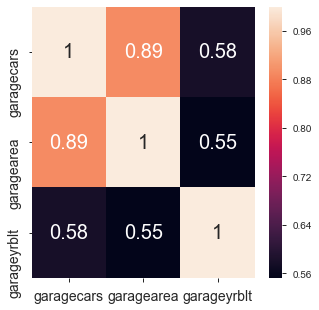

In [25]:
## garage related variables were chosen from the top correlated list and plotted
garage_trio = ['garagecars', 'garagearea', 'garageyrblt']

plt.figure(figsize = (5,5))
ax = sns.heatmap(df[garage_trio].corr(), annot = True, annot_kws={"size": 20})
ax.set_ylim(3,0)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [26]:
## finding the VIF
viffinder(garage_trio)

     variables        VIF
0   garagecars  33.658878
1   garagearea  28.954657
2  garageyrblt   9.930975


All of the garage related variables have VIF which shows high collinearity, thus `garagearea` will be chosen as it has the highest correlation to `saleprice`.

(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

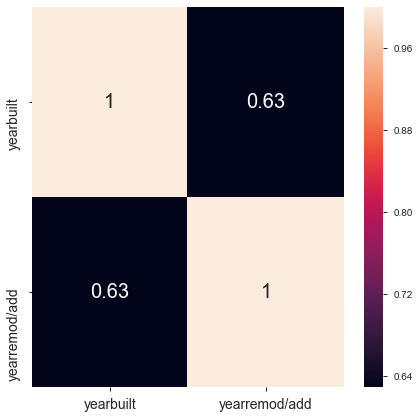

In [27]:
## the variables relating to year of last build were tested 
year_var = ['yearbuilt', 'yearremod/add']

plt.figure(figsize = (7,7))
ax = sns.heatmap(df[year_var].corr(), annot = True, annot_kws={"size": 20})
ax.set_ylim(2,0)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [28]:
#finding the VIF
viffinder(year_var)

       variables          VIF
0      yearbuilt  7023.224832
1  yearremod/add  7023.224832


Both `yearbuilt` and `yearremod/add` showed very high VIF values with each other, thus `yearremod/add` was dropped as it had a lower correlation.

In [29]:
## basement related variables were listed together
basementvar =[cat for cat in top_corr_list if cat.find('bsmt') >= 0 ]
basementvar

['totalbsmtsf', 'bsmtfinsf1', 'bsmtfullbath']

(array([0.5, 1.5, 2.5]), <a list of 3 Text xticklabel objects>)

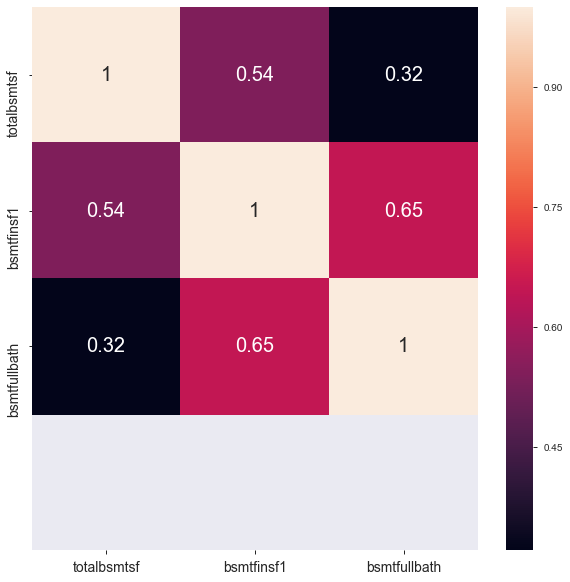

In [30]:
## basement related variables were plotted for correlation.
plt.figure(figsize = (10,10))
ax = sns.heatmap(df[basementvar].corr(), annot = True, annot_kws={"size": 20})
ax.set_ylim(4,0)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [31]:
viffinder(basementvar)

      variables       VIF
0   totalbsmtsf  2.700242
1    bsmtfinsf1  4.011483
2  bsmtfullbath  2.814722


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text xticklabel objects>)

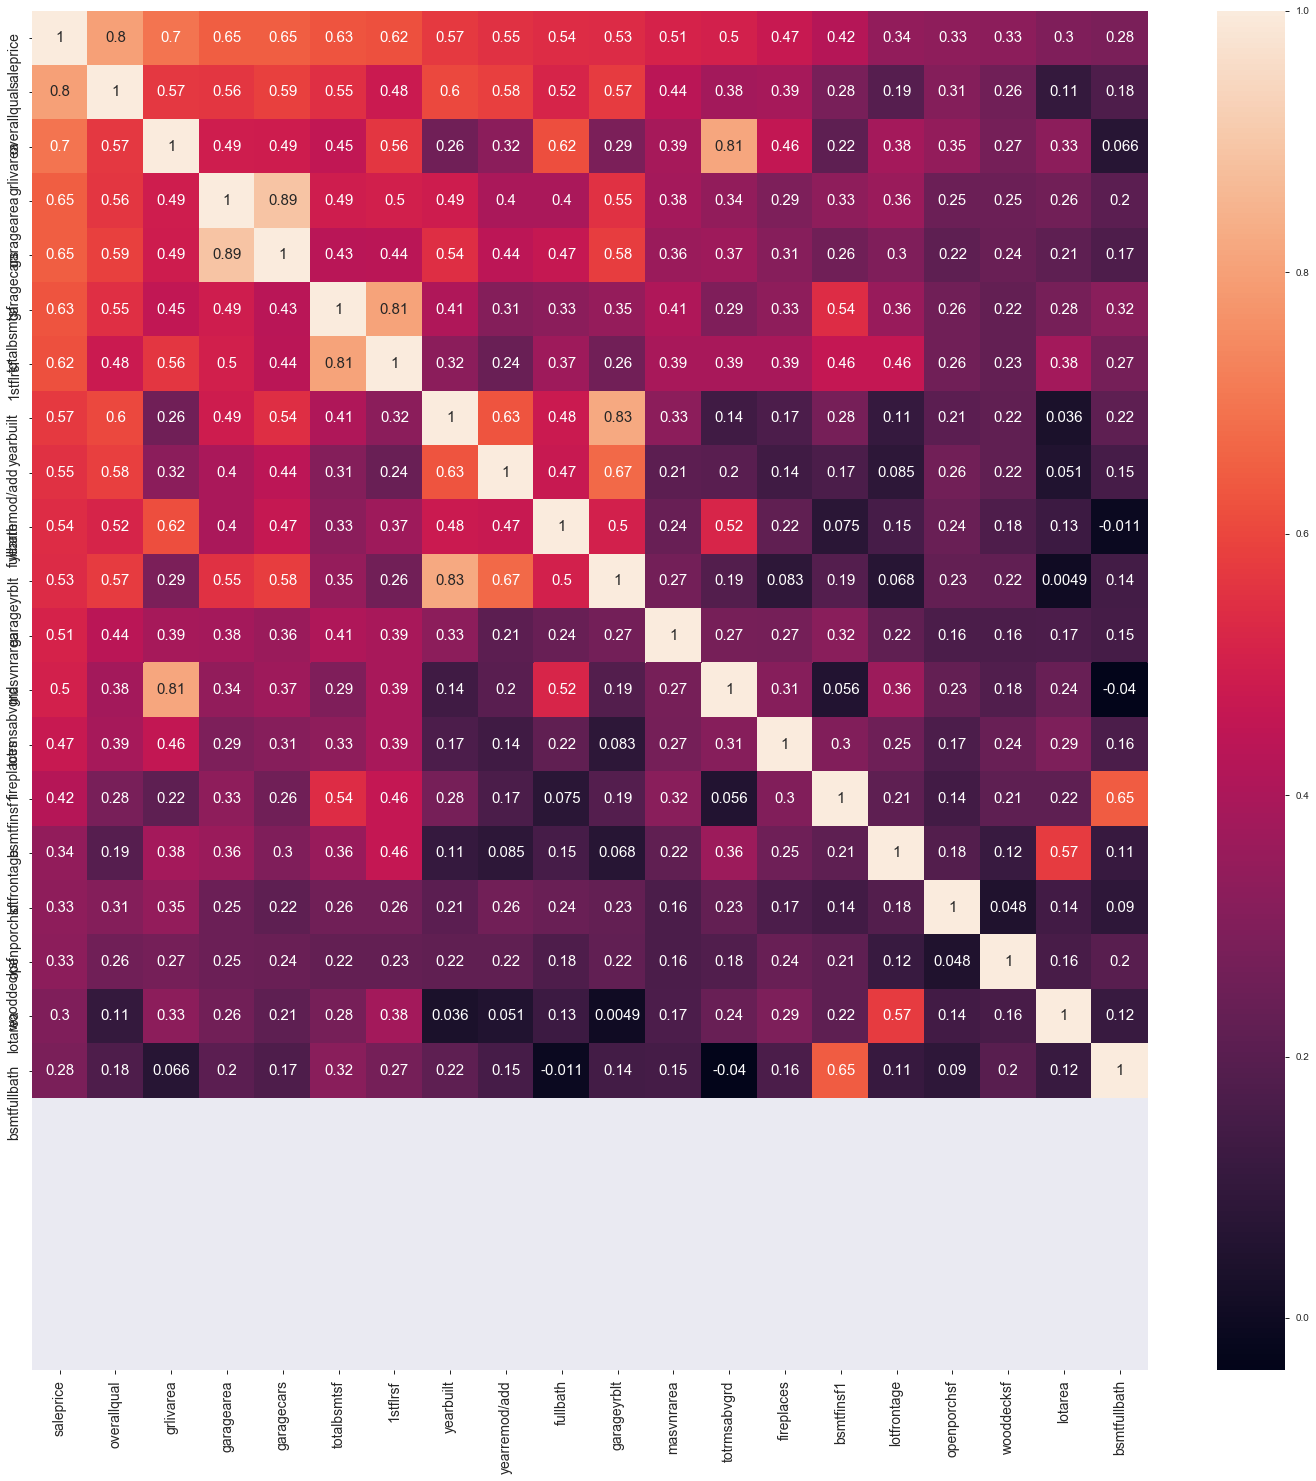

In [32]:
plt.figure(figsize = (25,25))
ax = sns.heatmap(df[top_corr_list].corr(), annot = True, annot_kws={"size": 15})
ax.set_ylim(25,0)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [33]:
## the rest of the variables are checked
tot_rooms = ['grlivarea', 'totrmsabvgrd', 'fullbath', \
             '1stflrsf','overallqual']

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

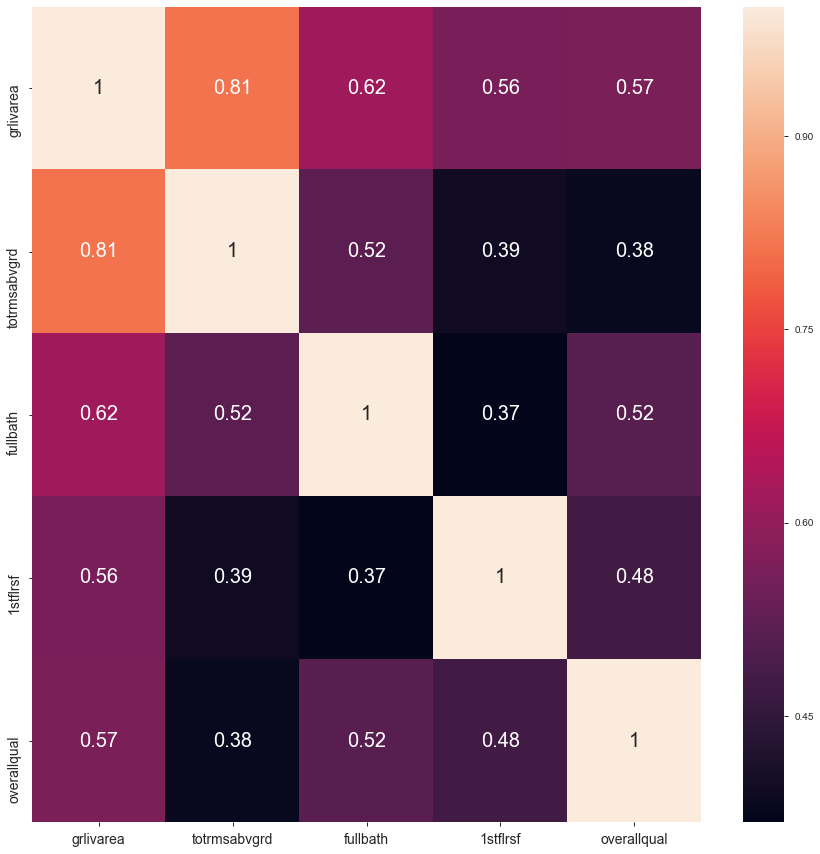

In [34]:
## the variables were plotted for correlation.
plt.figure(figsize = (15,15))
ax = sns.heatmap(df[tot_rooms].corr(), annot = True, annot_kws={"size": 20})
ax.set_ylim(5,0)
plt.yticks(size = 14)
plt.xticks(size = 14)

In [35]:
# VIF found
viffinder(tot_rooms)

      variables        VIF
0     grlivarea  36.804360
1  totrmsabvgrd  34.776712
2      fullbath  16.075335
3      1stflrsf  14.438963
4   overallqual  23.193200


In [36]:
## as overallqual was shown to be overall correlated to all variables, 
##it was removed to see if there was a considerable effect in collinearity
tot_rooms.remove('overallqual')
viffinder(tot_rooms)

      variables        VIF
0     grlivarea  36.701427
1  totrmsabvgrd  32.213834
2      fullbath  14.183354
3      1stflrsf  12.196138


All variables were shown to be high collinear to each other, thus `overallqual` was chosen to remain as it was the most highly correlated.

Out of the basement related variables, `bsmtfinsf1` was chosen to be be dropped as the VIF is trending high (4) and also has been shown to have a moderate correlation to the other two basement related variables.

In [37]:
## removing saleprice (as it is the same target) and also garagecars (highly related to garagearea)
top_corr_list.remove('saleprice') # removed as that is target
top_corr_list.remove('garagecars') # removed as VIF is high - high collinearity
top_corr_list.remove('bsmtfinsf1')# removed as VIF is high - high collinearity
top_corr_list.remove('yearremod/add') # removed as VIF is high - high collinearity
top_corr_list.remove('garageyrblt') #removed as VIF is high - high collinearity
top_corr_list.remove('grlivarea') #removed as VIF is high - high collinearity
top_corr_list.remove('totrmsabvgrd') #removed as VIF is high - high collinearity
top_corr_list.remove('fullbath') #removed as VIF is high - high collinearity
top_corr_list.remove('1stflrsf') #removed as VIF is high - high collinearity
#top_corr_list.remove('2ndflrsf') #removed as VIF is high - high collinearity
#top_corr_list.remove('bedroomabvgr') #removed as VIF is high - high collinearity
top_corr_list

['overallqual',
 'garagearea',
 'totalbsmtsf',
 'yearbuilt',
 'masvnrarea',
 'fireplaces',
 'lotfrontage',
 'openporchsf',
 'wooddecksf',
 'lotarea',
 'bsmtfullbath']

In [38]:
viffinder(top_corr_list)

       variables        VIF
0    overallqual  41.548779
1     garagearea   9.723808
2    totalbsmtsf  12.233314
3      yearbuilt  32.646867
4     masvnrarea   1.801791
5     fireplaces   2.359595
6    lotfrontage  15.876396
7    openporchsf   1.712817
8     wooddecksf   1.779452
9        lotarea   7.969987
10  bsmtfullbath   1.836572


### 5. Using simple statistical inference tests to determine a possible relationship between categorical  variables and price

I will be using a number of statistical inference tests to see if any of the relationships between categorical variables and price are significant before running linear regression.

In [39]:
## selecting categories for t-test 
ttest_list = []
for catkey, catvalues in cat_options.items(): 
    if catvalues == 2:
        ttest_list.append(catkey)
ttest_list

['street', 'centralair']

In [40]:
## creating a plotting function
def bpgraphduo(data1, data2):
    plt.boxplot()

In [41]:
## performing t-test on columns in ttest_list
cat_result_dict = {}
for tcand in ttest_list:
    cat1 = df[df[tcand]==(df[tcand].unique()[0])]['saleprice']
    cat2 = df[df[tcand]==(df[tcand].unique()[1])]['saleprice']
    t, p = stats.ttest_ind(cat1, cat2)
    sig = ''
    if p <= 0.05:
        sig = 'Y'
    else: 
        sig = 'N'
    cat_result_dict[tcand] = {df[tcand].unique()[0]:cat1.mean(),\
                              df[tcand].unique()[1]:cat2.mean(), \
                              'statistic': t, 'P': p, 'significance': sig}

cat_result_dict

{'street': {'Pave': 181793.56555772995,
  'Grvl': 86901.42857142857,
  'statistic': 3.169173295799292,
  'P': 0.0015512882730560206,
  'significance': 'Y'},
 'centralair': {'Y': 187441.50366492147,
  'N': 100575.0780141844,
  'statistic': 13.068548592323888,
  'P': 1.5113094019787156e-37,
  'significance': 'Y'}}

Both street and centralair variables showed a significant difference in mean salesprice between categories. 
* Houses with paved streets had higher sale price as compared to gravel. 
* Houses with central airconditioning had higher sale price as compared to those without

In [42]:
## removing ttestlist variables from cat_list so that it will not be run again
def rem_entry_list(list1, list2):
    for var1 in list1: 
        if var1 in list2:
            list2.remove(var1)
            next
        return list2
rem_entry_list(ttest_list, cat_list)

['mszoning',
 'lotshape',
 'landcontour',
 'utilities',
 'lotconfig',
 'landslope',
 'neighborhood',
 'condition1',
 'condition2',
 'bldgtype',
 'housestyle',
 'roofstyle',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heating',
 'heatingqc',
 'centralair',
 'electrical',
 'kitchenqual',
 'functional',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'paveddrive',
 'saletype']

In [43]:
## defining a function to perform ANOVA through the list 
def ANOVA_list(searchlist, dataframe, resultdict):
    a = {}
    for var in searchlist:
        var_unique_list = []
        count = 0
        resultdict[var] = {}
        for i in range(len(dataframe[var].unique())):
            count += 1 
            if pd.isnull(dataframe[var].unique()[i]) == True:
                next
            else:
                var_unique_list.append(dataframe[var].unique()[i])
                dataframe[var].unique()[i] = dataframe[dataframe[var]==\
                        (dataframe[var].unique()[i])]['saleprice']
        for cat in var_unique_list:
            if pd.isnull(cat) == True:
                next
            else:
                resultdict[var][str(cat)] = dataframe['saleprice'][dataframe[var] == cat].mean()
        f, p = stats.f_oneway(*(dataframe['saleprice'][dataframe[var] == cat] for cat in var_unique_list))
        resultdict[var]['statistic'] = f
        resultdict[var]['P'] = p 
    return resultdict

In [44]:
ANOVA_list(cat_list, df, cat_result_dict)

{'street': {'Pave': 181793.56555772995,
  'Grvl': 86901.42857142857,
  'statistic': 3.169173295799292,
  'P': 0.0015512882730560206,
  'significance': 'Y'},
 'centralair': {'Y': 187441.50366492147,
  'N': 100575.0780141844,
  'statistic': 170.78696230993063,
  'P': 1.5113094019793903e-37},
 'mszoning': {'RL': 191235.16458072592,
  'RM': 129119.14240506329,
  'FV': 218618.31683168316,
  'C (all)': 78010.8947368421,
  'A (agr)': 47300.0,
  'RH': 148859.57142857142,
  'I (all)': 57625.0,
  'statistic': 42.46657889196624,
  'P': 4.706623428740341e-49},
 'lotshape': {'IR1': 211848.67052023122,
  'Reg': 162925.81235521234,
  'IR2': 233954.74545454545,
  'IR3': 193182.22222222222,
  'statistic': 72.48679839510044,
  'P': 1.491278709891155e-44},
 'landcontour': {'Lvl': 178998.5648399349,
  'HLS': 262353.37647058826,
  'Bnk': 142868.775,
  'Low': 199313.11627906977,
  'statistic': 39.23484353043047,
  'P': 1.1956767644954456e-24},
 'utilities': {'AllPub': 181551.60224499757,
  'NoSeWa': 137500.

In [45]:
# iterating the dictionary to provide list of significant 
significantlist = []
for key1, dict1 in cat_result_dict.items(): 
    for key2, value1 in dict1.items():
        if key2 == 'P':
            if value1 < 0.05:
                significantlist.append(key1)
        else: 
            next
significantlist

['street',
 'centralair',
 'mszoning',
 'lotshape',
 'landcontour',
 'lotconfig',
 'landslope',
 'neighborhood',
 'condition1',
 'condition2',
 'bldgtype',
 'housestyle',
 'roofstyle',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heating',
 'heatingqc',
 'electrical',
 'kitchenqual',
 'functional',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'paveddrive',
 'saletype']

In [46]:
## creating a dict of variables with highest statistic 
top_Fstatistic_dict = {}
index = []
count = 0
for key1, dict1 in cat_result_dict.items(): 
    if dict1['P'] <= 0.05:
        top_Fstatistic_dict[key1] = dict1['statistic']
        index.append(count)
        count += 1
    else: 
        next
Fstat_df = pd.DataFrame(list(top_Fstatistic_dict.items()), index = index, columns = ["variable", "stat"])


In [47]:
## creating a list of categorical variables with high T or F statistic
top_stat_list = list(Fstat_df.sort_values(by = 'stat', ascending = False).nlargest(15,['stat'])['variable'])

In [48]:
## removing related variables 
top_stat_list.remove('bsmtexposure')
top_stat_list.remove('bsmtfintype1')
top_stat_list.remove('garagetype')

top_stat_list

['exterqual',
 'kitchenqual',
 'bsmtqual',
 'garagefinish',
 'masvnrtype',
 'centralair',
 'foundation',
 'heatingqc',
 'neighborhood',
 'paveddrive',
 'lotshape',
 'saletype']

### Finding out which categorical variables that have NaN values 
To properly determine which categorical variables have logical NaN values that can be explained I created a na_list so as to determine out of the dataset which variables have a nan unique category. 


In [49]:
## finding which categorical variable has nan unique cat
na_list = []
for col in cat_list:
    for cat in df[col].unique():
        if type(cat) == float:
            na_list.append(col)
print('categories with nan entries', na_list)

categories with nan entries ['masvnrtype', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'garagetype', 'garagefinish', 'garagequal', 'garagecond']


I then compared the variables to the data dictionary provided in the kaggle website with other documentation. 

|Variables|NaN meaning|Decision|
|---|---|---|
|masvnrtype|missing values|to use an imputer to fill|
|bsmtqual|No basement|change to a new category with No basement or use the continuous variable for the model|
|bsmtcond|No basement|change to a new category with No basement or use the continuous variable for the model|
|bsmtexposure|No basement|change to a new category with No basement or use the continuous variable for the model|
|bsmtfintype1|No basement|change to a new category with No basement or use the continuous variable for the model|
|bsmtfintype2|No basement|change to a new category with No basement or use the continuous variable for the model|
|garagetype|No garage|change to a new category with No garage or use the continuous variable for the model|
|garagefinish|No garage|change to a new category with No garage or use the continuous variable for the model|
|garagequal|No garage|change to a new category with No garage or use the continuous variable for the model|
|garagecond|No garage|change to a new category with No garage or use the continuous variable for the model|

Assumption: All categorical variables are true as a visual check on the available variables on the list shows that there are no ordinal nor categorical variables on it. 

In [50]:
df[top_stat_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 12 columns):
exterqual       2051 non-null object
kitchenqual     2051 non-null object
bsmtqual        1996 non-null object
garagefinish    1937 non-null object
masvnrtype      2029 non-null object
centralair      2051 non-null object
foundation      2051 non-null object
heatingqc       2051 non-null object
neighborhood    2051 non-null object
paveddrive      2051 non-null object
lotshape        2051 non-null object
saletype        2051 non-null object
dtypes: object(12)
memory usage: 208.3+ KB


In [51]:
## filling in the missing variables
print(df.bsmtqual.mode())
print(df.garagefinish.mode())
print(df.masvnrtype.mode())

0    TA
dtype: object
0    Unf
dtype: object
0    None
dtype: object


To impute the missing entries for categorical variables, the mode of each column will be used. 

In [52]:
## replacing all NaN with mode
df['bsmtqual'].fillna('TA', inplace = True)
df['garagefinish'].fillna('Unf', inplace = True)
df['masvnrtype'].fillna('None', inplace = True)

In [53]:
df[top_stat_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 12 columns):
exterqual       2051 non-null object
kitchenqual     2051 non-null object
bsmtqual        2051 non-null object
garagefinish    2051 non-null object
masvnrtype      2051 non-null object
centralair      2051 non-null object
foundation      2051 non-null object
heatingqc       2051 non-null object
neighborhood    2051 non-null object
paveddrive      2051 non-null object
lotshape        2051 non-null object
saletype        2051 non-null object
dtypes: object(12)
memory usage: 208.3+ KB


**Imputing missing values in continuous variables**

Missing entries in continuous variables are imputed with the median or mean of the variable depending if it is normally distributed.

In [54]:
df[top_corr_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 11 columns):
overallqual     2051 non-null int64
garagearea      2050 non-null float64
totalbsmtsf     2050 non-null float64
yearbuilt       2051 non-null int64
masvnrarea      2029 non-null float64
fireplaces      2051 non-null int64
lotfrontage     1721 non-null float64
openporchsf     2051 non-null int64
wooddecksf      2051 non-null int64
lotarea         2051 non-null int64
bsmtfullbath    2049 non-null float64
dtypes: float64(5), int64(6)
memory usage: 192.3 KB


(0.9763252139091492, 6.247190586439361e-18)
480.0


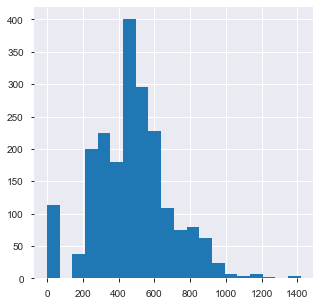

In [55]:
df.garagearea.hist(figsize = (5,5), bins = 20)
print(stats.shapiro(df.garagearea.dropna())) 
## The Shapiro-Wilks test showed the distribution is significantly non- normal 
print(df.garagearea.median())
df.garagearea.fillna(df.garagearea.median(), inplace=True)

(0.9275934100151062, 2.227390454751659e-30)
994.5


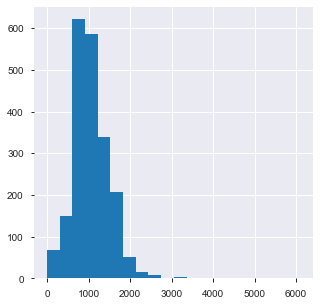

In [56]:
df.totalbsmtsf.hist(figsize = (5,5), bins = 20)
print(stats.shapiro(df.totalbsmtsf.dropna()))
## The Shapiro-Wilks test showed the distribution is significantly non- normal 
print(df.totalbsmtsf.median())
df.totalbsmtsf.fillna(df.totalbsmtsf.median(), inplace=True)

(0.6384734511375427, 0.0)
0.0


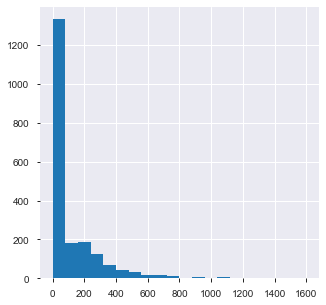

In [57]:
df.masvnrarea.hist(figsize = (5,5), bins = 20)
print(stats.shapiro(df.masvnrarea.dropna()))
## The Shapiro-Wilks test showed the distribution is significantly non- normal 
print(df.masvnrarea.median())
df.masvnrarea.fillna(df.masvnrarea.median(), inplace=True)

(0.9032180309295654, 1.1170793345525248e-31)
68.0


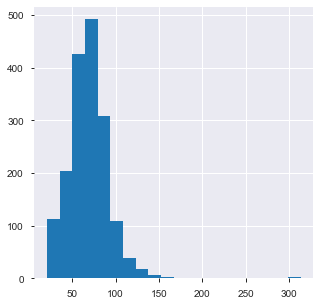

In [58]:
df.lotfrontage.hist(figsize = (5,5), bins = 20)
print(stats.shapiro(df.lotfrontage.dropna()))
## The Shapiro-Wilks test showed the distribution is significantly non- normal 
print(df.lotfrontage.median())
df.lotfrontage.fillna(df.lotfrontage.median(), inplace = True)

(0.6606758832931519, 0.0)
0.0


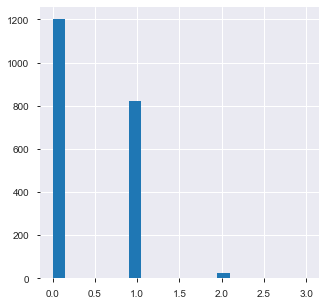

In [59]:
df.bsmtfullbath.hist(figsize = (5,5), bins = 20)
print(stats.shapiro(df.bsmtfullbath.dropna()))
## The Shapiro-Wilks test showed the distribution is significantly non- normal 
print(df.bsmtfullbath.median())
df.bsmtfullbath.fillna(df.bsmtfullbath.median(), inplace = True)

In [60]:
df[top_corr_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 11 columns):
overallqual     2051 non-null int64
garagearea      2051 non-null float64
totalbsmtsf     2051 non-null float64
yearbuilt       2051 non-null int64
masvnrarea      2051 non-null float64
fireplaces      2051 non-null int64
lotfrontage     2051 non-null float64
openporchsf     2051 non-null int64
wooddecksf      2051 non-null int64
lotarea         2051 non-null int64
bsmtfullbath    2051 non-null float64
dtypes: float64(5), int64(6)
memory usage: 192.3 KB


**Making dummies of categorical variables**

Changing the variables into dummy coded variables. This is for the ease of doing linear regression later. 

In [61]:
interest=top_stat_list+top_corr_list
interest.append('saleprice')
interestdf = df[interest]

In [62]:
interestdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 24 columns):
exterqual       2051 non-null object
kitchenqual     2051 non-null object
bsmtqual        2051 non-null object
garagefinish    2051 non-null object
masvnrtype      2051 non-null object
centralair      2051 non-null object
foundation      2051 non-null object
heatingqc       2051 non-null object
neighborhood    2051 non-null object
paveddrive      2051 non-null object
lotshape        2051 non-null object
saletype        2051 non-null object
overallqual     2051 non-null int64
garagearea      2051 non-null float64
totalbsmtsf     2051 non-null float64
yearbuilt       2051 non-null int64
masvnrarea      2051 non-null float64
fireplaces      2051 non-null int64
lotfrontage     2051 non-null float64
openporchsf     2051 non-null int64
wooddecksf      2051 non-null int64
lotarea         2051 non-null int64
bsmtfullbath    2051 non-null float64
saleprice       2051 non-null int64
dtypes:

In [63]:
## making dummy variables
interestdf = pd.get_dummies(interestdf, drop_first = True)

In [64]:
interestdf.head()

,overallqual,garagearea,totalbsmtsf,yearbuilt,masvnrarea,fireplaces,lotfrontage,openporchsf,wooddecksf,lotarea,...,lotshape_IR3,lotshape_Reg,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
Id,,,,,,,,,,,,,,,,,,,,,
109,6,475.0,725.0,1976,289.0,0,68.0,44,0,13517,...,0,0,0,0,0,0,0,0,0,1
544,7,559.0,913.0,1996,132.0,1,43.0,74,0,11492,...,0,0,0,0,0,0,0,0,0,1
153,5,246.0,1057.0,1953,0.0,0,68.0,52,0,7922,...,0,1,0,0,0,0,0,0,0,1
318,5,400.0,384.0,2006,0.0,0,73.0,0,100,9802,...,0,1,0,0,0,0,0,0,0,1
255,6,484.0,676.0,1900,0.0,0,82.0,59,0,14235,...,0,0,0,0,0,0,0,0,0,1


In [65]:
interestdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 77 columns):
overallqual             2051 non-null int64
garagearea              2051 non-null float64
totalbsmtsf             2051 non-null float64
yearbuilt               2051 non-null int64
masvnrarea              2051 non-null float64
fireplaces              2051 non-null int64
lotfrontage             2051 non-null float64
openporchsf             2051 non-null int64
wooddecksf              2051 non-null int64
lotarea                 2051 non-null int64
bsmtfullbath            2051 non-null float64
saleprice               2051 non-null int64
exterqual_Fa            2051 non-null uint8
exterqual_Gd            2051 non-null uint8
exterqual_TA            2051 non-null uint8
kitchenqual_Fa          2051 non-null uint8
kitchenqual_Gd          2051 non-null uint8
kitchenqual_TA          2051 non-null uint8
bsmtqual_Fa             2051 non-null uint8
bsmtqual_Gd             2051 non-null uint8
bsm

In [66]:
interest_list = (list(interestdf.columns))

In [67]:
interest_list.remove('saleprice')

In [68]:
len(interest_list)

76

In [69]:
lr = LinearRegression()

In [70]:
X = interestdf[interest_list]
y = interestdf['saleprice']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [78]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc=ss.transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [79]:
model = lr.fit(X_train_sc,y_train)
score = model.score(X_train_sc,y_train)

predictions = model.predict(X_train_sc)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.]), <a list of 8 Text xticklabel objects>)

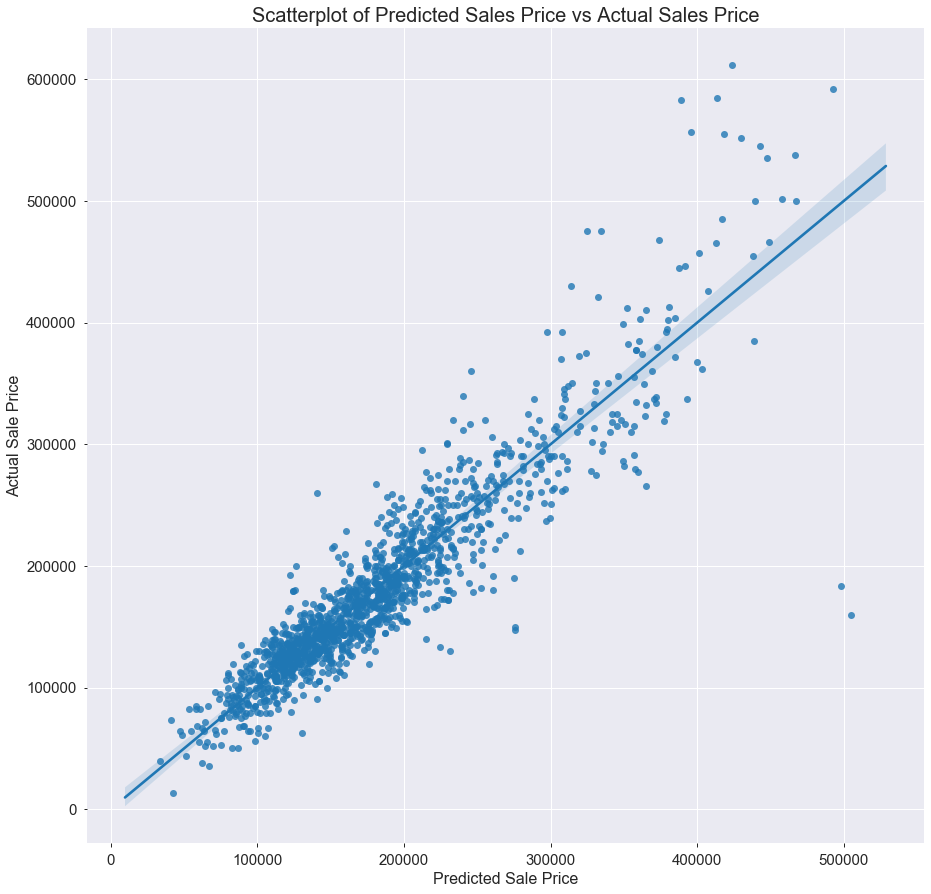

In [80]:
## plotting the fit of the predicted vs the actual sale price
plt.figure(figsize = (15,15))
ax = sns.regplot(predictions, y_train)
ax.plot()
ax.set_title('Scatterplot of Predicted Sales Price vs Actual Sales Price', size = 20)
ax.set_ylabel('Actual Sale Price', size = 16)
ax.set_xlabel('Predicted Sale Price', size = 16)
plt.yticks(size = 15)
plt.xticks(size = 15)

In [81]:
print(model.coef_)
print(model.intercept_)
np.sqrt(mean_squared_error(y_train, predictions))

[ 1.91719280e+04  7.27058348e+03  4.47913952e+03  2.05183641e+02
  4.58592144e+03  9.45818387e+03  1.65656853e+03  1.92123765e+03
  2.43506340e+03  7.53737713e+03  4.41124409e+03 -3.88445028e+03
 -1.28573684e+04 -1.66523976e+04 -6.08404442e+03 -1.45163323e+04
 -1.85444750e+04 -3.81193637e+03 -9.89537747e+03 -8.00747429e+02
 -9.44494241e+03 -3.47651806e+03 -3.32414260e+03  5.57346062e+03
  7.68629466e+03  3.53515048e+03  4.24096787e+02 -3.15423647e+02
  1.66272766e+03  1.03925873e+03  7.04443962e+02  2.39792491e+02
 -1.77135216e+03 -1.12792532e+03 -1.01857698e+03 -3.44155698e+03
 -5.70501441e+02 -1.32458969e+03  2.41484027e+02  9.43341596e+02
  2.51993627e+03  4.62908528e+03 -2.78689849e+03  1.25615902e+03
 -8.99870466e+02  3.76775561e+03 -1.62728680e+03 -1.10339427e+01
 -5.15997629e+02  5.32764757e+02 -2.16152722e+02  6.61113675e+01
  3.00662833e+03  1.03615538e+04  8.88994154e+03 -8.80186609e+02
 -1.35538734e+02 -1.18429711e+03  1.77727738e+03  3.33455705e+03
  9.99495677e+03  2.85689

31305.23238786227

In [82]:
print(score)

0.8470250273417794


In [83]:
score2 =lr.score(X_test_sc, y_test)

prediction2 = model.predict(X_test_sc)

(array([     0., 100000., 200000., 300000., 400000., 500000.]),
 <a list of 6 Text xticklabel objects>)

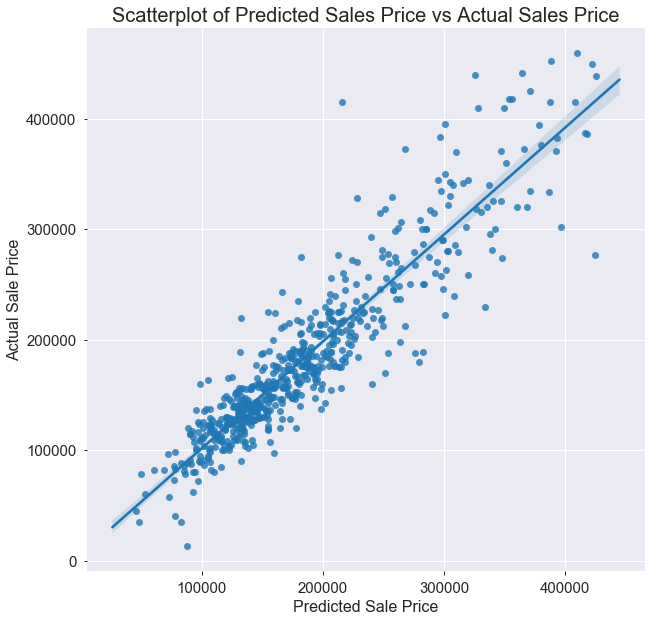

In [84]:
## plotting the fit of the predicted vs the actual sale price
plt.figure(figsize = (10,10))
ax = sns.regplot(prediction2, y_test)
ax.plot()
ax.set_title('Scatterplot of Predicted Sales Price vs Actual Sales Price', size = 20)
ax.set_ylabel('Actual Sale Price', size = 16)
ax.set_xlabel('Predicted Sale Price', size = 16)
plt.yticks(size = 15)
plt.xticks(size = 15)

In [85]:
print(model.coef_)
print(model.intercept_)
np.sqrt(mean_squared_error(y_test, prediction2))

[ 1.91719280e+04  7.27058348e+03  4.47913952e+03  2.05183641e+02
  4.58592144e+03  9.45818387e+03  1.65656853e+03  1.92123765e+03
  2.43506340e+03  7.53737713e+03  4.41124409e+03 -3.88445028e+03
 -1.28573684e+04 -1.66523976e+04 -6.08404442e+03 -1.45163323e+04
 -1.85444750e+04 -3.81193637e+03 -9.89537747e+03 -8.00747429e+02
 -9.44494241e+03 -3.47651806e+03 -3.32414260e+03  5.57346062e+03
  7.68629466e+03  3.53515048e+03  4.24096787e+02 -3.15423647e+02
  1.66272766e+03  1.03925873e+03  7.04443962e+02  2.39792491e+02
 -1.77135216e+03 -1.12792532e+03 -1.01857698e+03 -3.44155698e+03
 -5.70501441e+02 -1.32458969e+03  2.41484027e+02  9.43341596e+02
  2.51993627e+03  4.62908528e+03 -2.78689849e+03  1.25615902e+03
 -8.99870466e+02  3.76775561e+03 -1.62728680e+03 -1.10339427e+01
 -5.15997629e+02  5.32764757e+02 -2.16152722e+02  6.61113675e+01
  3.00662833e+03  1.03615538e+04  8.88994154e+03 -8.80186609e+02
 -1.35538734e+02 -1.18429711e+03  1.77727738e+03  3.33455705e+03
  9.99495677e+03  2.85689

30456.783209954032

In [86]:
n = 2051

In [87]:
p = len(interest_list)
adjr2_lr = 1-(1-(score2))*(n-1)/(n-p-1)
adjr2_lr

0.8388387983525463

In [88]:
lr_scores = cross_val_score(lr, X_train_sc, y_train, cv = 5)
print(lr_scores)
lr_scores.mean()

[-2.65096709e+23  8.06879067e-01  8.77969263e-01  8.18349090e-01
 -6.91972319e+23]


-1.9141380571119498e+23

In [89]:
lr2_scores = cross_val_score(lr, X_test_sc, y_test, cv = 5)
print(lr2_scores)
lr2_scores.mean()

[ 6.39822003e-01 -7.23176842e+22  8.70188259e-01  8.45415888e-01
 -1.51237295e+25]


-3.039209428728463e+24

### Lasso Regression

In [90]:
ls = LassoCV(n_alphas = 200)

In [91]:
ls_scores = cross_val_score(ls, X_train_sc, y_train, cv = 5)
print(ls_scores)
ls_scores.mean()

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You sho

[0.82404009 0.8030608  0.86546868 0.82080157 0.67164419]


0.797003065982718

In [92]:
ls.fit(X_train_sc, y_train)

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [93]:
ls.score(X_train_sc, y_train)

0.8412953732104218

In [94]:
ls_scores2 = cross_val_score(ls, X_test_sc, y_test, cv = 5)
print(ls_scores2)
ls_scores2.mean()

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You sho

[0.81052212 0.88281358 0.85591468 0.83995004 0.82574079]


0.8429882430084883

In [95]:
score2 = ls.score(X_test_sc, y_test)

In [96]:
predls = ls.predict(X_test_sc)

In [97]:
ls_test_r2score = r2_score(y_test, predls)
ls_test_r2score

0.8433000956097191

In [98]:
np.sqrt(mean_squared_error(y_test, predls))

30604.938115860907

In [99]:
sum(ls.coef_ != 0)

58

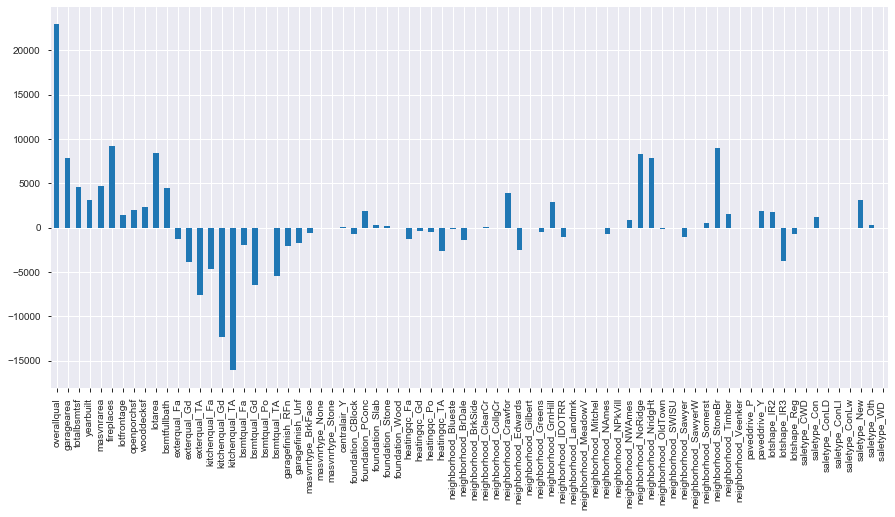

In [100]:
pd.Series(ls.coef_, index = interest_list).plot.bar(figsize=(15,7))

In [101]:
p = np.sum(ls.coef_ != 0)
adjr2_ls = 1-(1-(ls_test_r2score))*(n-1)/(n-p-1)
adjr2_ls

0.838737548192733

In [102]:
residual_ls = y_test - predls

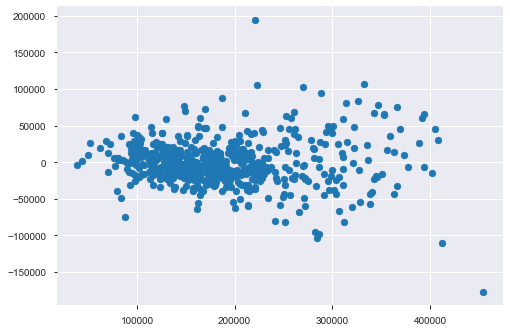

In [103]:
plt.scatter(predls, residual_ls)

### Ridge Regression

In [104]:
rd = RidgeCV(alphas = np.linspace(0.1, 10, 100))

In [105]:
rd_scores = cross_val_score(rd, X_train_sc, y_train, cv = 3)
print(rd_scores)
rd_scores.mean()

[0.82134139 0.85987294 0.67070747]


0.7839739330158545

In [106]:
print(rd.fit(X_train_sc, y_train))
print(rd.score(X_train_sc, y_train))

RidgeCV(alphas=array([ 0.1,  0.2, ...,  9.9, 10. ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)
0.846913026539677


In [107]:
rd_scores2 = cross_val_score(rd, X_test_sc, y_test, cv = 3)
print(rd_scores2)
rd_scores2.mean()

[0.80951266 0.85030287 0.83416649]


0.8313273398089329

In [108]:
rd.score(X_test_sc, y_test)

0.8446118177694197

In [109]:
predrd = rd.predict(X_test_sc)

In [110]:
rdr2score= r2_score(y_test, predrd)
rdr2score

0.8446118177694197

In [111]:
np.sqrt(mean_squared_error(y_test, predrd))

30476.57319386873

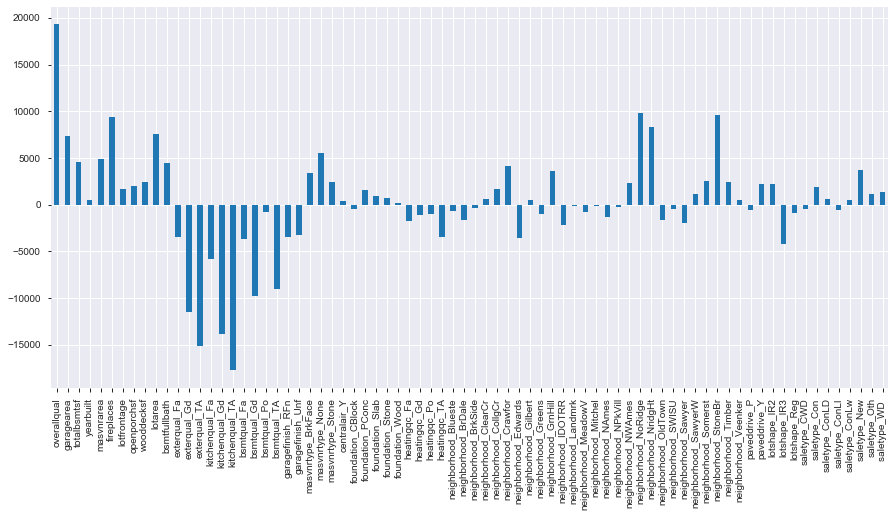

In [112]:
pd.Series(rd.coef_, index = interest_list).plot.bar(figsize=(15,7))

In [113]:
p = np.sum(rd.coef_ != 0)
adjr2_rd = 1-(1-(rdr2score))*(n-1)/(n-p-1)
adjr2_rd

0.8386292940361249

In [114]:
residuals = y_test - predrd

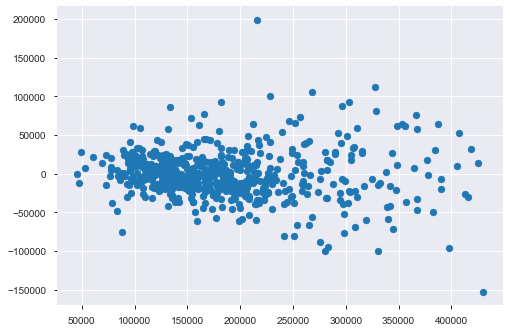

In [115]:
plt.scatter(predrd, residuals)

Test data

In [116]:
test = pd.read_csv('../project_2/datasets/test.csv', index_col='Id')

In [117]:
#look at the data structure
test.info()
#columns of note: Alley, Pool QC, Fence, Misc Feature, Fireplace QC  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 2658 to 1939
Data columns (total 79 columns):
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof Matl          879 non-null object
E

In [118]:
test.shape

(879, 79)

**Dropping data that have significantly incomplete data**

Data that are have less than 60% data are dropped as they would signifcantly influence the data.

In [119]:
test = test.drop('Alley', axis = 1)

In [120]:
test = test.drop('Pool QC', axis = 1)

In [121]:
test = test.drop("Fence", axis = 1)

In [122]:
test = test.drop("Misc Feature", axis = 1)

In [123]:
test = test.drop("Fireplace Qu", axis = 1)

In [124]:
test = test.drop("PID", axis = 1)

In [125]:
test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,
2658,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,60,112,0,0,0,0,4,2006,WD
2718,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,170,0,0,0,0,0,0,8,2006,WD
2414,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,100,24,0,0,0,0,0,9,2006,New
1989,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,184,0,0,0,0,7,2007,WD
625,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,76,0,0,185,0,0,7,2009,WD


In [126]:
test_col = test.columns
test_rename_dict = {}
for col in test_col: 
    test_rename_dict[col] = col.lower().replace(' ', "")

test.rename(columns = test_rename_dict, inplace = True)
test.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremod/add', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea',
       'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd',
       'functional', 'fireplaces', 'garagetype', 'garageyrblt', 'garagefinish',
       'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive',
       'wooddecksf', 'openporchsf

In [127]:
interesttest = [x for x in interest if x != 'saleprice']

In [128]:
test_interest_only = test[interesttest]

In [129]:
test_interest_only = pd.get_dummies(test_interest_only, drop_first = True)

In [130]:
test_interest_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879 entries, 2658 to 1939
Data columns (total 76 columns):
overallqual             879 non-null int64
garagearea              879 non-null int64
totalbsmtsf             879 non-null int64
yearbuilt               879 non-null int64
masvnrarea              878 non-null float64
fireplaces              879 non-null int64
lotfrontage             719 non-null float64
openporchsf             879 non-null int64
wooddecksf              879 non-null int64
lotarea                 879 non-null int64
bsmtfullbath            879 non-null int64
exterqual_Fa            879 non-null uint8
exterqual_Gd            879 non-null uint8
exterqual_TA            879 non-null uint8
kitchenqual_Fa          879 non-null uint8
kitchenqual_Gd          879 non-null uint8
kitchenqual_Po          879 non-null uint8
kitchenqual_TA          879 non-null uint8
bsmtqual_Fa             879 non-null uint8
bsmtqual_Gd             879 non-null uint8
bsmtqual_Po             879

(0.6358155608177185, 1.6494277847012768e-39)
0.0


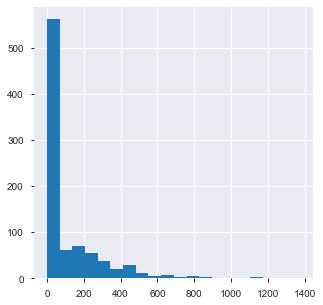

In [136]:
test_interest_only.masvnrarea.hist(figsize = (5,5), bins = 20)
print(stats.shapiro(test_interest_only.masvnrarea.dropna()))
## The Shapiro-Wilks test showed the distribution is significantly non- normal 
print(test_interest_only.masvnrarea.median())
test_interest_only.masvnrarea.fillna(test_interest_only.masvnrarea.median(), inplace=True)

(0.9502686262130737, 7.748459195772682e-15)
68.0


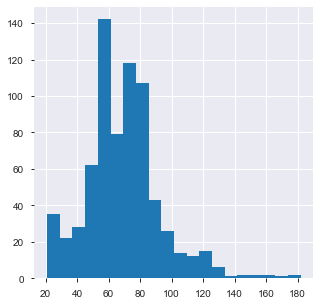

In [138]:
test_interest_only.lotfrontage.hist(figsize = (5,5), bins = 20)
print(stats.shapiro(test_interest_only.lotfrontage.dropna()))
## The Shapiro-Wilks test showed the distribution is significantly non- normal 
print(test_interest_only.lotfrontage.median())
test_interest_only.lotfrontage.fillna(test_interest_only.lotfrontage.median(), inplace = True)

In [139]:
X_test_test = test_interest_only

In [140]:
ss = StandardScaler()
ss.fit(X_test_test)
X_test_test_sc=ss.transform(X_test_test)

/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ongzhongliang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [141]:
predtestls = ls.predict(X_test_test_sc)
predtestls

In [143]:
test_interest_only['SalePrice'] = predtestls

In [144]:
test_interest_only.describe()

,overallqual,garagearea,totalbsmtsf,yearbuilt,masvnrarea,fireplaces,lotfrontage,openporchsf,wooddecksf,lotarea,...,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_VWD,saletype_WD,SalePrice
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,...,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,6.054608,470.832765,1036.750853,1970.533561,106.861206,0.618885,69.333333,47.478953,93.560865,10340.920364,...,0.002275,0.001138,0.010239,0.002275,0.003413,0.089875,0.003413,0.001138,0.858931,180717.969338
std,1.374756,213.070155,419.258428,30.403527,188.284115,0.669313,21.373811,69.209179,121.174306,10047.335167,...,0.047673,0.033729,0.100725,0.047673,0.058354,0.286165,0.058354,0.033729,0.348291,61045.370816
min,2.000000,0.000000,0.000000,1880.000000,0.000000,0.000000,21.000000,0.000000,0.000000,1477.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-353169.467587
25%,5.000000,323.000000,790.000000,1954.000000,0.000000,0.000000,60.000000,0.000000,0.000000,7298.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,143841.877069
50%,6.000000,473.000000,975.000000,1972.000000,0.000000,1.000000,68.000000,27.000000,0.000000,9453.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,172553.864190
75%,7.000000,576.000000,1248.000000,2000.000000,173.000000,1.000000,78.500000,70.000000,171.000000,11606.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,206864.808226
max,10.000000,1488.000000,3138.000000,2010.000000,1378.000000,3.000000,182.000000,742.000000,690.000000,215245.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,496770.174397


In [150]:
test_interest_only.sort_index()

,overallqual,garagearea,totalbsmtsf,yearbuilt,masvnrarea,fireplaces,lotfrontage,openporchsf,wooddecksf,lotarea,...,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_VWD,saletype_WD,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2,5,730,882,1961,0.0,0,80.0,0,140,11622,...,0,0,0,0,0,0,0,0,1,154386.963177
4,7,522,2110,1968,0.0,2,93.0,0,0,11160,...,0,0,0,0,0,0,0,0,1,241199.110241
6,6,470,926,1998,20.0,1,78.0,36,360,9978,...,0,0,0,0,0,0,0,0,1,169461.433283
7,8,582,1338,2001,0.0,0,41.0,0,0,4920,...,0,0,0,0,0,0,0,0,1,201460.956897
17,8,492,559,1988,0.0,0,152.0,12,325,12134,...,0,0,0,0,0,0,0,0,1,205642.464724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,4,0,546,1970,0.0,0,21.0,34,0,1526,...,0,0,0,0,0,0,0,0,1,95162.684577
2921,4,286,546,1970,0.0,0,21.0,24,0,1894,...,0,0,0,0,0,0,0,0,1,104400.499585
2922,6,574,1728,1976,0.0,0,55.0,0,40,12640,...,0,0,0,0,0,0,0,0,1,181035.947249


In [151]:
test_interest_only.SalePrice.to_csv('../project_2/datasets/result.csv', index_label = ['Id'], header = ['SalePrice'])